In [1]:
import pandas as pd
import numpy as np

In [3]:
##### 1.Load the data file using pandas. 
Google_app_rating=pd.read_csv("C:/Users/anesa/Downloads/googleplaystore.csv")

# Exploratory Data Analysis

In [ ]:
Google_app_rating.isnull()
Google_app_rating.isnull().sum(axis=0)

In [6]:
Google_app_rating=Google_app_rating.dropna()

In [7]:
####Converting the size to kb; 
# Removing "varies with device" values from the size column
Google_app_rating=Google_app_rating.loc[Google_app_rating['Size']!="Varies with device"]


In [8]:
#Extracting numeric value of size
Google_app_rating['mb_availability'] = Google_app_rating.Size.str.find('M')

In [9]:
Google_app_rating['size_in_numeric']=Google_app_rating.Size.str.replace("M",'').str.replace("k",'').astype('float32')


In [10]:
Google_app_rating['SizeinKb']=np.where(Google_app_rating.mb_availability>-1,(Google_app_rating.size_in_numeric*1000),Google_app_rating.size_in_numeric)


In [11]:
#  Converting reviews column from obj to int data type
Google_app_rating.Reviews=Google_app_rating.Reviews.astype('int32')

In [12]:
#### Installs field is currently stored as string and has values like 1,000,000+. 
        ### 1 Treat 1,000,000+ as 1,000,000
        ### 2 remove ‘+’, ‘,’ from the field, convert it to integer
Google_app_rating['Installs_num']=Google_app_rating.Installs.str.replace("+",'').str.replace(",",'').astype('int32')
Google_app_rating=Google_app_rating.drop(['Installs','Size','size_in_numeric'],axis=1)

C:\Users\anesa\AppData\Local\Temp/ipykernel_8520/575837102.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Google_app_rating['Installs_num']=Google_app_rating.Installs.str.replace("+",'').str.replace(",",'').astype('int32')


In [14]:
# Price field is a string and has $ symbol. Removing ‘$’ sign, and converting it to numeric.
Google_app_rating['Priceindollar']=Google_app_rating.Price.str.replace("$",'').astype('float32')

C:\Users\anesa\AppData\Local\Temp/ipykernel_8520/2822569814.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Google_app_rating['Priceindollar']=Google_app_rating.Price.str.replace("$",'').astype('float32')


In [ ]:
''' Sanity checks:

            1 Average rating should be between 1 and 5 as only these values are allowed on the play store. 
                Drop the rows that have a value outside this range.
            2 Reviews should not be more than installs as only those who installed can review the app. If there are any 
                such records, drop them.
            3 For free apps (type = “Free”), the price should not be >0.Drop any such rows.
'''

In [15]:
### 1 Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
Google_app_rating=Google_app_rating[(Google_app_rating.Rating>=1) & (Google_app_rating.Rating<=5)]

In [16]:
### 2 Reviews should not be more than installs as only those who installed can review the app.Dropping such records.
Google_app_rating=Google_app_rating[Google_app_rating.Reviews<=Google_app_rating.Installs_num]


# Performing univariate analysis: 


{'whiskers': [<matplotlib.lines.Line2D at 0x259beae1820>,
 'caps': [<matplotlib.lines.Line2D at 0x259beae1e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x259beae13d0>],
 'medians': [<matplotlib.lines.Line2D at 0x259beafb5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x259beafb970>],
 'means': []}

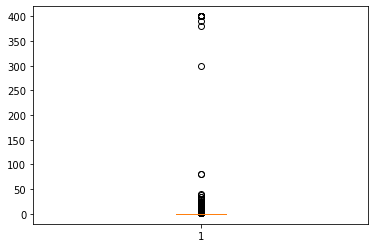

In [17]:
## Boxplot for Price,

import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(Google_app_rating.Priceindollar)

Observation : 
From this observation, IQR =UpperLimit &LowerLimit
and the  outliers could be price above 100$


In [18]:
#Checking if the reviews have unusual values using Inter Quartile Range ?

Q1 = np.percentile(Google_app_rating.Reviews,[25,75])[0]
Q3 =np.percentile(Google_app_rating.Reviews,[25,75])[1]
IQR= Q3=Q1
UpperLimit = Q3+1.5*IQR
LowerLimit = Q1-1.5*IQR
print('Q1: ',+Q1)
print('Q3: ',+Q3)
print('UpperLimit: ',+UpperLimit)
print('LowerLimit: ',+LowerLimit)
print('IQR: ',+IQR)

Q1:  109.0
Q3:  109.0
UpperLimit:  272.5
LowerLimit:  -54.5
IQR:  109.0


Observation : 
Here, IQR =109 and Upperlimit is 272.5
From the boxplot, we can see some values above the uperlimit.272.5
these are outliers
and the highest value is ~4.5e7 which is very high than IQR and UL
This value is truly an outlier, because this huge value for revbiew doesnt seems to be right

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

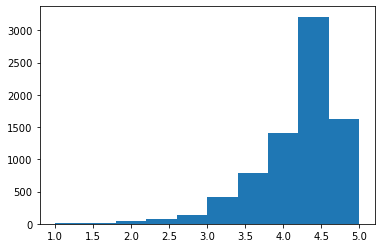

In [19]:
# 2. Histogram for Rating
plt.hist(Google_app_rating.Rating)

Observation :
The 'rating' distribution is negatively skewed as the curve is more bended towards the higher ratings
So the median of the ratings will be greater than the average rating.


(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05], dtype=float32),
 <BarContainer object of 10 artists>)

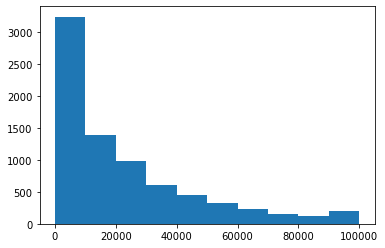

In [21]:
# 3. Histogram for Size
plt.hist(Google_app_rating.SizeinKb)

Observation :
size less than 1mb is as outlier


# Outlier treatment: 


In [23]:
#1 Price: From the box plot, it seems like there are some apps with very high price. 
#A price of $200 for an application on the Play Store is very high and suspicious!Check out such records with very high price
#deleting the records with apps priced above 200$
Google_app_rating=Google_app_rating.loc[(Google_app_rating.Priceindollar<=200)]

In [24]:
#2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it.
#Droping records having more than 2 million reviews.
Google_app_rating=Google_app_rating.loc[(Google_app_rating.Reviews<2000000)]

In [25]:
#3 Installs:  There seems to be some outliers in this field too. 
#Apps having very high number of installs should be dropped from the analysis.
#3.1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

percentile=[10, 25, 50, 70, 90, 95, 99]
for p in percentile:
    percntle=np.percentile(Google_app_rating.Installs_num,[p])
    print('Percentile',p)
    print(percntle)

Percentile 10
[1000.]
Percentile 25
[10000.]
Percentile 50
[100000.]
Percentile 70
[1000000.]
Percentile 90
[10000000.]
Percentile 95
[10000000.]
Percentile 99
[50000000.]


In [27]:
##3.2 Decide a threshold as cutoff for outlier 
#and drop records having values more than that
''' the values falling below one Percentile p1
and above 90 percentile P90 can be considered outliers  '''
#droping values below 1 percentile and above 90 percentile
P1=np.percentile(Google_app_rating.Installs_num,[1])
P90=np.percentile(Google_app_rating.Installs_num,[90])

print('P1= ',+P1)
print('P90= ',+P90)

P1=  [50.]
P90=  [10000000.]


In [31]:
#droping values below 1 percentile and above 90 percentile
Google_app_rating=Google_app_rating.loc[(Google_app_rating.Installs_num>=50)&(Google_app_rating.Installs_num<=10000000)]


# Bivariate analysis: 


Text(0, 0.5, 'Priceindollar')

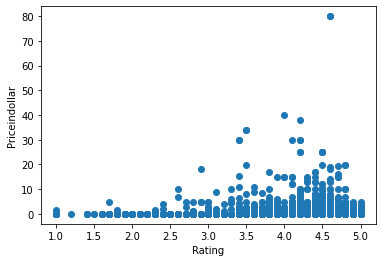

In [32]:
# scatter plot/joinplot for Rating vs. Price
plt.scatter(Google_app_rating.Rating,Google_app_rating.Priceindollar)
plt.xlabel('Rating')
plt.ylabel('Priceindollar')

Observation:
The price of the app increses with the rating 
for approximately upto 4 to 4.5 star ratings after which, it is decreasing

Text(0, 0.5, 'SizeinKb')

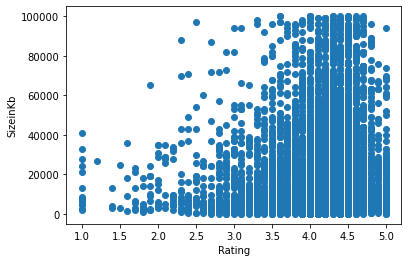

In [34]:
## scatter plot/joinplot for Rating vs. Size
plt.scatter(Google_app_rating.Rating,Google_app_rating.SizeinKb)
plt.xlabel('Rating')
plt.ylabel('SizeinKb')

Observation:
The heavier apps are mostly rated above3.5 , which means heavier apps are rated better.


Text(0, 0.5, 'Reviews')

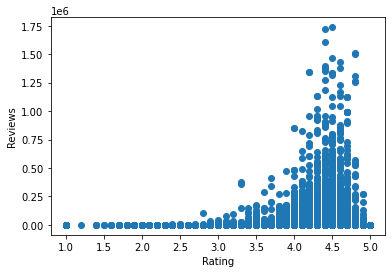

In [35]:
# scatter plot/joinplot for Rating vs. Reviews
plt.scatter(Google_app_rating.Rating,Google_app_rating.Reviews)
plt.xlabel('Rating')
plt.ylabel('Reviews')

Observation:
From the scatter plot, greater the number of reviews, greater the ratings

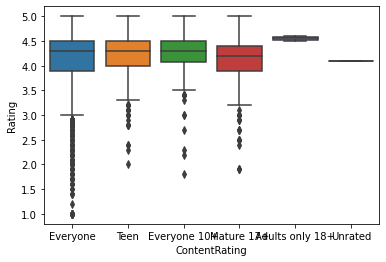

In [36]:
# boxplot for Rating vs. Content Rating
Google_app_rating['ContentRating']=Google_app_rating['Content Rating']
import seaborn as sns
sns.boxplot(y=Google_app_rating.Rating,x=Google_app_rating.ContentRating)
plt.show()

Adults only catagory have only higher number of Ratings (it has only limited records)
the other catagories doesnt seem to have much unique pattern.Mostly all the catagory have an IQR~4.3
Every one catagory seems to have many poor ratings



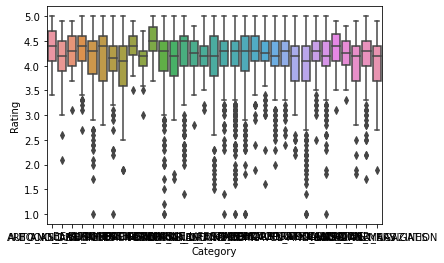

In [37]:
#boxplot for Ratings vs. Category


import seaborn as sns
sns.boxplot(x=Google_app_rating.Category,y=Google_app_rating.Rating)
plt.show()


Art & design,Educatioon,Events,entertainment,weather,libraries and demo have more number of good ratings (ratings above 3.5)
than other Genres

# Data preprocessing


In [38]:
inp1=Google_app_rating

In [39]:
## Reviews and Install have some values that are still relatively very high.Before building a linear regression model, we need to reduce the skew.
#Apply log transformation (np.log1p) to Reviews and Installs.
inp1.Reviews=np.log1p(inp1.Reviews)
inp1.Installs_num=np.log1p(inp1.Installs_num)


In [40]:
##Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for the task.
inp1=inp1.drop(['App','Last Updated','Current Ver','Android Ver','Content Rating'],axis=1)

In [41]:
##Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric.
#Dummy encoding is one way to convert character fields to numeric. Name of dataframe inp2.
np.unique(inp1.Category)

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [43]:
inp2 = pd.get_dummies(inp1,prefix_sep='_',columns=['Category','Genres','ContentRating'])
inp2=inp2.drop(['Type','Price'],axis=1)

In [46]:
## Train test split using 70-30 split. Naming the new dataframes df_train and df_test.
x=inp2.drop('Rating',axis=1)
y=inp2.Rating

# Regression Analysis

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.30)

In [48]:
df_test = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True)],axis=1)
df_train= pd.concat([x_train.reset_index(drop=True),y_train.reset_index(drop=True)],axis=1)


 Model building

In [50]:
R2 = LinearRegression().fit(x_train,y_train)
R2.coef_

array([ 1.73530959e-01,  3.16731783e-02, -3.59682534e-07, -1.48132418e-01,
       -2.66381667e-03, -1.68839942e-01,  2.04819436e-02,  9.36111808e-02,
        4.93120454e-02, -3.34836185e-02,  2.04714883e-01, -7.62799176e-02,
       -1.21918084e-01, -4.80217323e-03, -5.52564619e-02,  1.80155012e-01,
        5.95688325e-03, -3.38677188e-02, -5.79139396e-02,  2.02886466e-01,
       -1.86481268e-02, -3.46692597e-02,  4.98987558e-02, -5.64080696e-02,
       -8.00911012e-02, -3.73231830e-03, -3.81346111e-02,  6.77265568e-02,
        4.23721676e-02, -6.74834184e-02, -4.56093486e-02, -2.23937042e-03,
       -2.63719916e-02,  1.68485663e-01, -9.08871533e-02, -7.11369909e-02,
        5.95362185e-03, -3.78156361e-03, -2.55492888e-01,  1.79919436e-02,
       -3.14753406e-01, -1.28010491e-01,  1.19941591e-01, -2.85682935e-01,
       -2.48305229e-01, -6.06841606e-02,  9.54930579e-12,  4.29060951e-01,
        3.74582140e-01,  1.17928465e-01,  2.04819436e-02,  9.36111808e-02,
       -3.43306979e-01,  

In [51]:
R2.intercept_


4.58607871743536

In [52]:
predicted_rating = pd.DataFrame(R2.predict(x_test),columns=['Predicted_rating'])
predicted_rating

,Predicted_rating
0,4.107541
1,4.338244
2,4.322358
3,3.974246
4,4.461329
...,...
2166,4.302921
2167,4.179768
2168,4.509778
2169,4.274597


In [53]:
df_test = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True),predicted_rating],axis=1)


Accuracy of the model

In [54]:
df_test['err_pct'] = abs(df_test.Rating-df_test.Predicted_rating)/df_test.Rating


In [56]:
error = df_test.err_pct.mean()
print('Error in the model: ',error)
Accuracy = 1- df_test.err_pct.mean()
print('Accuracy of the model: ',Accuracy)
rsq = r2_score(df_test.Rating,df_test.Predicted_rating)
print('R Square value: ',rsq)

Error in the model:  0.10070762161473633
Accuracy of the model:  0.8992923783852637
R Square value:  0.13149723011094483


Accuracy of the model is 89.9% 
R2 value is 13% which is less.which means the model explains some of the variation in the response variable around its mean.